<a href="https://colab.research.google.com/github/Mekondjo-EDSA/in2deep/blob/development/MK_fastai_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 3.8 MB/s 
     |████████████████████████████████| 1.2 MB 51.4 MB/s 
     |████████████████████████████████| 189 kB 51.3 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 51 kB 289 kB/s 


In [ ]:
import fastbook
from fastbook import *
from fastai.vision.all import *
import torch
device = torch.device('cuda:0'if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [ ]:
#set up notebook for fast.ai
fastbook.setup_book

<function fastbook.setup_book>

In [ ]:
path = Path('.')

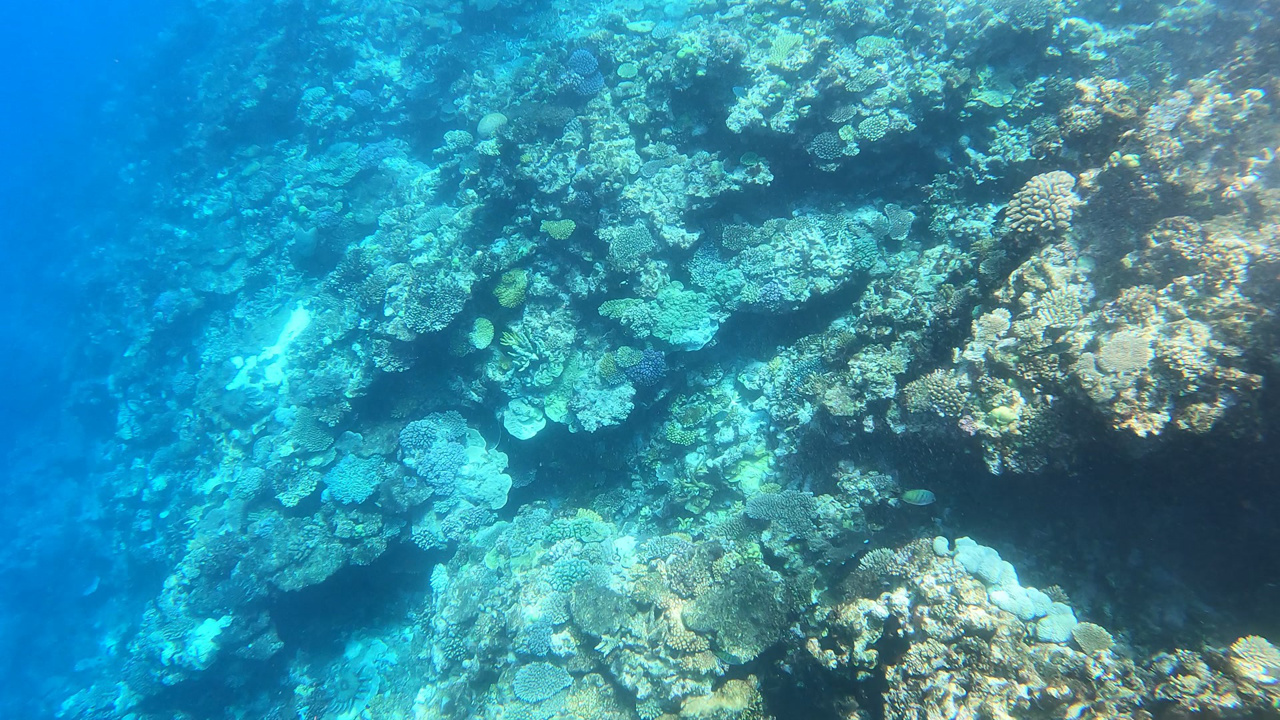

In [ ]:
img_files = get_image_files(path)
img = PILImage.create(img_files[100])
img

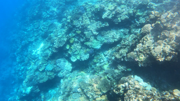

In [ ]:
img.to_thumb(180)

In [ ]:
path.ls()

(#4919) [Path('/content/drive/MyDrive/dataset/1_9131.jpg'),Path('/content/drive/MyDrive/dataset/1_9132.jpg'),Path('/content/drive/MyDrive/dataset/1_9133.jpg'),Path('/content/drive/MyDrive/dataset/1_9134.jpg'),Path('/content/drive/MyDrive/dataset/1_9135.jpg'),Path('/content/drive/MyDrive/dataset/1_9136.jpg'),Path('/content/drive/MyDrive/dataset/1_9137.jpg'),Path('/content/drive/MyDrive/dataset/1_9138.jpg'),Path('/content/drive/MyDrive/dataset/1_9139.jpg'),Path('/content/drive/MyDrive/dataset/1_9140.jpg')...]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mainframe.csv')

In [ ]:
df.head()

,image_name,bbox,xmin,ymin,xmax,ymax,label
0,./dataset/0_16.jpg,"[559, 213, 50, 32]",559,213,609,245,starfish
1,./dataset/0_17.jpg,"[558, 213, 50, 32]",558,213,608,245,starfish
2,./dataset/0_18.jpg,"[557, 213, 50, 32]",557,213,607,245,starfish
3,./dataset/0_19.jpg,"[556, 214, 50, 32]",556,214,606,246,starfish
4,./dataset/0_20.jpg,"[555, 214, 50, 32]",555,214,605,246,starfish


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11898 entries, 0 to 11897
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  11898 non-null  object
 1   bbox        11898 non-null  object
 2   xmin        11898 non-null  int64 
 3   ymin        11898 non-null  int64 
 4   xmax        11898 non-null  int64 
 5   ymax        11898 non-null  int64 
 6   label       11898 non-null  object
dtypes: int64(4), object(3)
memory usage: 650.8+ KB


In [ ]:
fnames = get_image_files(path)

In [ ]:
fnames[0]

Path('/content/drive/MyDrive/dataset/1_9131.jpg')

In [ ]:
dblock = DataBlock()

In [ ]:
dsets = dblock.datasets(fnames)

In [ ]:
dsets.train[0]

(Path('/content/drive/MyDrive/dataset/0_9235.jpg'),
 Path('/content/drive/MyDrive/dataset/0_9235.jpg'))

In [ ]:
dblock = DataBlock(get_items=get_image_files)

In [ ]:
dsets = dblock.datasets(path)
dsets.train[0]

(Path('/content/drive/MyDrive/dataset/1_9075.jpg'),
 Path('/content/drive/MyDrive/dataset/1_9075.jpg'))

In [ ]:
parent_label(fnames[0])

'dataset'

In [ ]:
img_size = 128
augmentations = [
        Rotate(10, p=0.4, mode='bilinear'), 
        Brightness(max_lighting=0.3,p=0.5),
        Contrast(max_lighting=0.4, p=0.5),
        RandomErasing(p=0.3, sl=0.0, sh=0.2, min_aspect=0.3, max_count=1),
        Flip(p=0.5),
        Zoom(max_zoom=1,p=0.5),
        RandomResizedCrop(img_size)
    ]
dls = ImageDataLoaders.from_df(df=df,
                               path='',
                               fn_col= 0,
                               label = 6,
                               valid_pct = 0.2, 
                               bs = 32, 
                               device=device, 
                               num_workers=0, 
                               batch_tfms=augmentations, 
                               item_tfms=Resize(img_size))
dls.show_batch()

FileNotFoundError: ignored